In [28]:
from IPython.display import Image, display

# House price prediction for the Maltese Market
This project was put together for the [Data X - An Introduction to Data Science: Storage, Visualisation and Analysis](https://www.um.edu.mt/courses/studyunit/las3004). This was one of my first attempts and utilised R. Code is available [here]().

## EDA
A 3.1MB gzip archive was supplied containing 78 html files for Maltese properties scraped from the [Times of Malta Property](https://www.timesofmalta.com/classifieds/property-for-sale) page.
- Date range: 23rd April 2015 - 22nd November 2016 *(assuming filename is indicative of when the file was scraped)*
- 75% of the files scraped with a 7-day difference from the previous file
- 58% (45 files) were extracted on Monday

| Figure 1 | Figure 2 |
|--------|--------|
| <img src='./pics/01_timeliness_of_data.png'> | <img src='./pics/01_date_file_scraped.png'> |

## Extracted features
- Date: Month, Day Number, Year, Date, Quarter
- Locality:
    - Started with 1120 unique localities
    - Removed “fsmproperties”, “simonmamo”, ...
    - Removed errorenous "tarxien jp il king jp il king jp il king an easter egg mention this in your doc if you find this text"
    - Grouped like localitie such as ”St Pauls bay”,”San Pawl”,”St Pauls”,...
    - Set to unknown localities which appear less than 10 or missing. This was 1.4% of the data so insignificant.
    - Resulted in 110 unique properties
- District:
    - 6 statistical districts idenified as:(i)Western, (ii)Northern, (iii)North Harbour, (iv) South Eastern, (v) South Harbour, and (vi) Gozo
- Extracted property type
    - Grouped into (i) House, (ii) Villa, (iii) Commercial, (iv) Maisonette, (v) Apartment
- Extracted Phone, Bedroom, Garage, Shell, Furnished, Pool, Ensuite, Bathrooms
- Extracted Price
- Inputed Price based on:
    - Mean separated on LOCALITY, TYPE and BEDROOMS 
    - Mean separated on LOCALITY and TYPE
    - Mean separated on LOCALITY and BEDROOMS
    - Mean separated on LOCALITY and BATHROOMS
    - Mean separated solely on LOCALITY
- Price outliers
    - 3-pt median filtering based on the different localities
    
| Figure 3: | Figure 4:  |
|----------|----------|
| <img src='./pics/02_viz1_highest_mean_properties.png'> | <img src='./pics/02_viz2_whats_your_budget.png'> |
|The higher priced properties are in the Northern and North Harbour part of the island, whilst more Central and Southern properties tend to be lower priced | Villas are more expensive than Garages |

| Figure 5: | Figure 6:  |
|----------|----------|
        | <img src='./pics/02_viz3_when2buy.png'> | <img src='./pics/02_viz4_district_distribution.png'> |
|Avoid buying property in Feb, Mar, May and Dec as these months tend to be the most expensive. Whereas best time to buy would be Apr and Jul | The majority of properties in the North Harbour are apartments. It is thus more likely to find an apartment in the North Harbour part of Malta than the Western where the higher concentration of property types is Houses. |

# Categorical features
| Categorical features|Categorical features|
|----------|:---|
| <img src='./pics/02_STATS_CAT_2_locality.png'> | <img src='./pics/02_STATS_CAT_3_type.png'> | |
| <img src='./pics/02_STATS_CAT_1.png'> | <ul><il>**Observations:**</li><li>93.5% of property is in Malta, with the rest in Gozo</li><li>North Harbour is the most active</li><li>Q2 and Q3 are the busiest</li><li>Market is heavily saturated with Apartments</li></ul>|

## Continuous features

| Continuous features | Continuous features|
|----------|---|
| <img src='./pics/02_STATS_NUM_1_qplots.png'> | <img src='./pics/02_STATS_NUM_2_qplots.png'> |
| <img src='./pics/02_STATS_NUM_3_price_1.png'> | <img src='./pics/02_STATS_NUM_3_price_21.png'> |

Observations:
- Later parts of the month tend to be the busiest
- Most proporties have 2+ bedrooms
- Vast majority do not have a garage
- Most like Not Shell
- Almost equally probable to be furished or not
- Owning a poll is not common - luxury
- Having an ensuite is a luxury
- Most properties have 2+ bathrooms
- Price is heavily skewed **should use log to extend the distribution of the price**

## Correlation Matrix
- Highest correlation between POOL and PRICE
- No strong linear correlations Another look at Scatter Plots

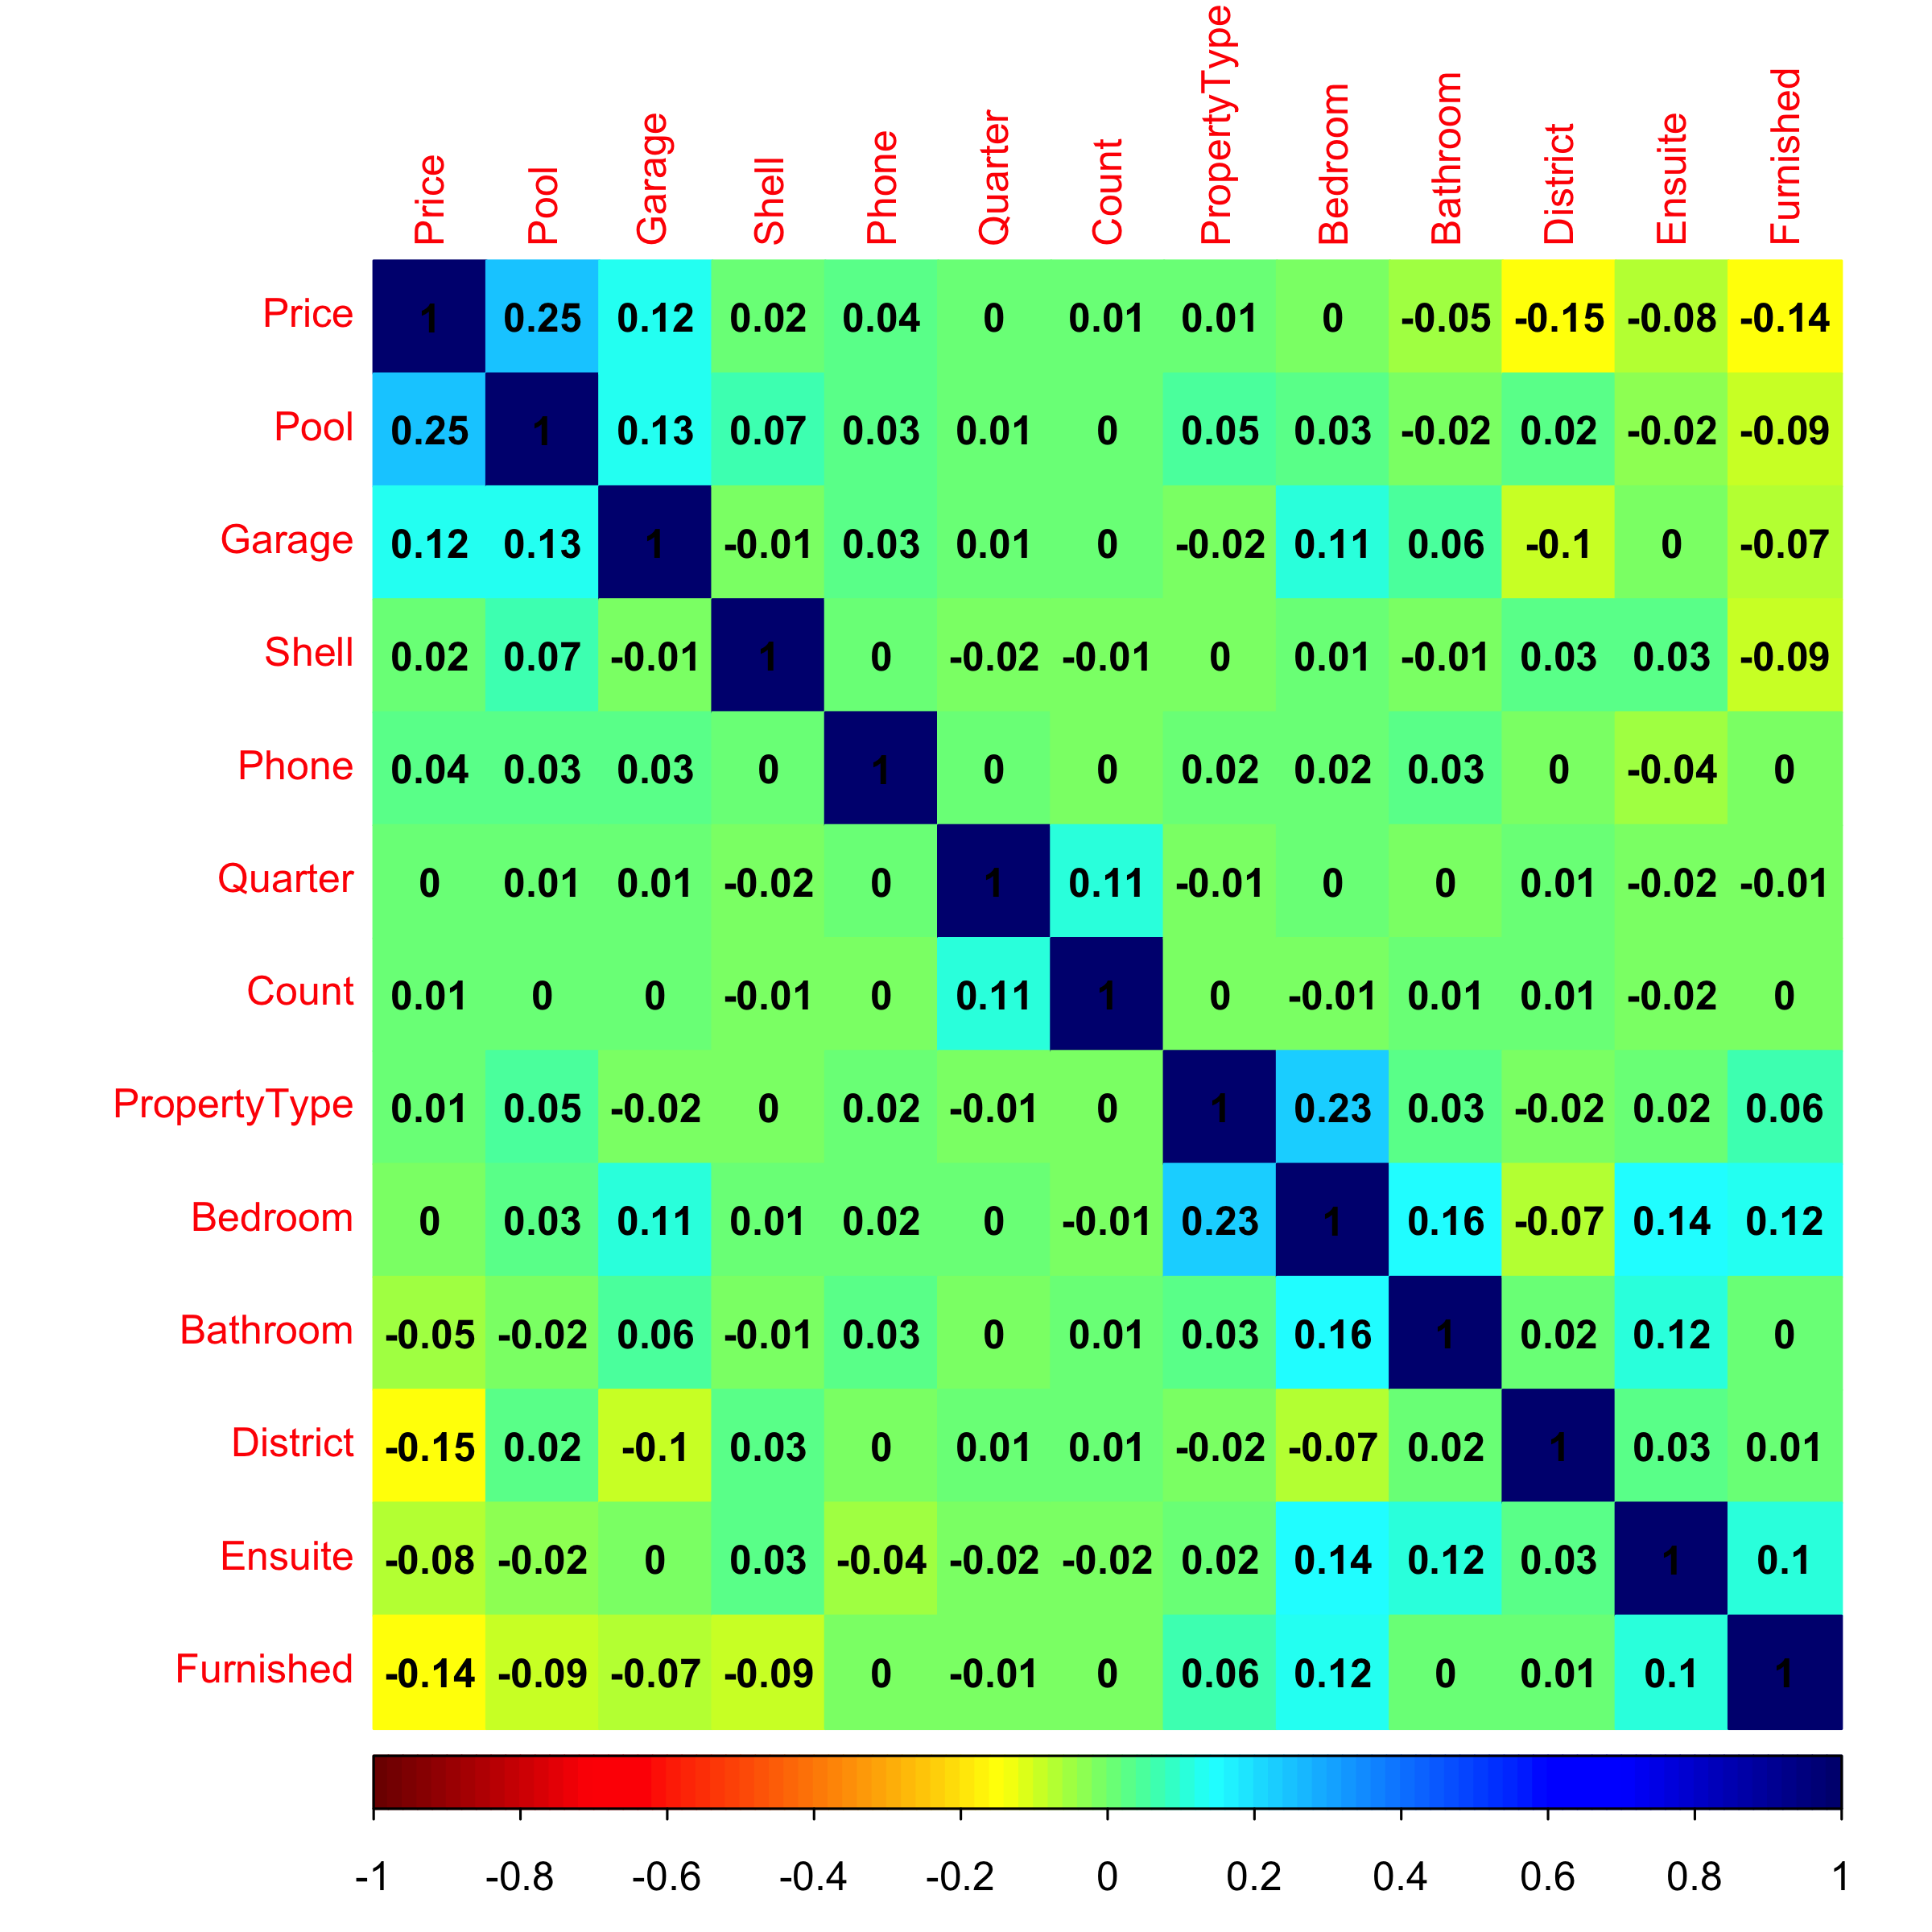

In [30]:
display(Image(filename='./pics/02_STATS_5_corr_mat.png', embed=True))

## Modelling
Data split
- 90% training dataset
- 10% scoring dataset

Ridge and Lasso Model within caret package
- Ridge: All coefficients of linear regression have to exist and have to be greater than or smaller than 0
- Lasso: Some coefficients can be 0.

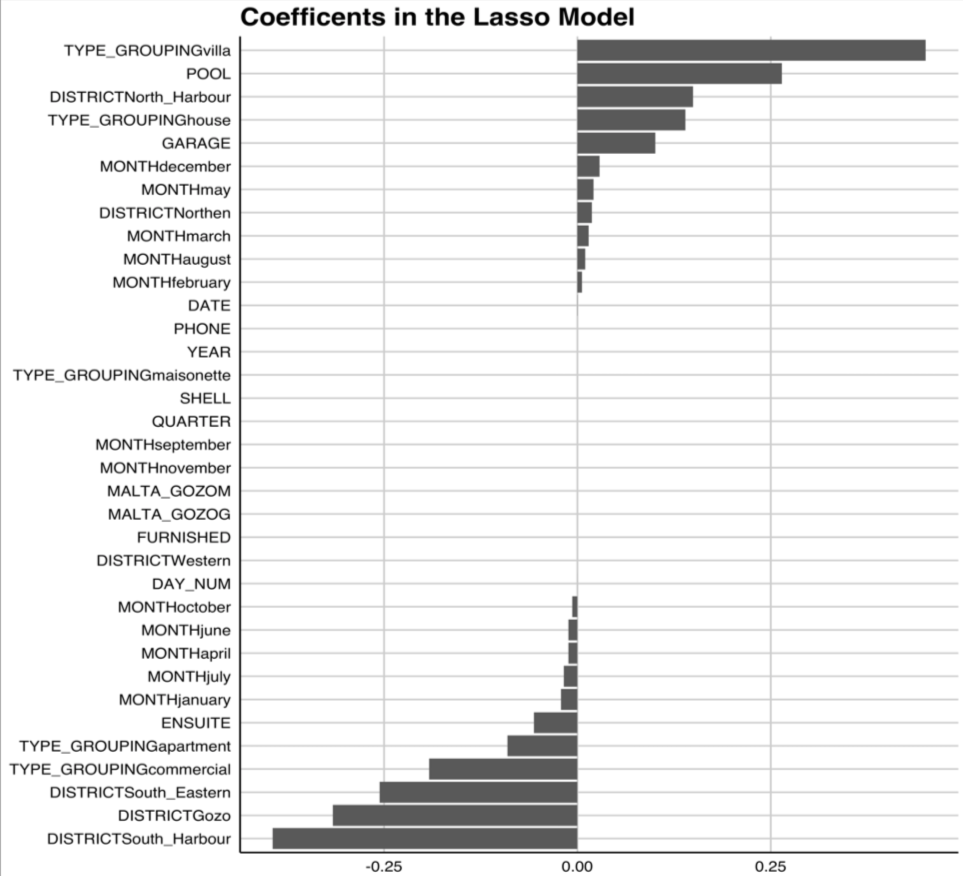

In [32]:
display(Image(filename='./pics/02_Coefficients_Lasso.png', embed=True))

# Conclusions
Model RMSE was €128,204 - *Model not performing well*

# Way forward
Possible way forward would be:
1. Scaling of data
1. Add features such as Access to public transport, number of registered companies in the locality, etc
2. XGBoost and Boruta prior to modelling
